In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
from pathlib import Path
import os
from datetime import date, datetime
import numpy as np

# Table of Contents

1. Load of the Data
2. Quick Look at the Full History of GUS CPI Inflation
3. Cumulative Growth of the Level of Consumer Prices in the Years 2000-2023
4. Zooming in the Period Since 2019: CPI Price Level Indexed to Dec 2018
5. CPI Inflation, Nominal and Real Remuneration in Enterprise Sector

## 1. Load of the Data

#### 1. GUS data on Inflation

In [2]:
data_gus = pd.read_csv(
    Path(os.getcwd()) / "data" / "monthly_GUS_data_2024-02-03.csv", 
    sep=";", decimal=",", date_format="%d.%m.%Y", parse_dates=["yearmon"], na_values=".")
data_gus = data_gus.set_index("yearmon")

In [19]:
data_money = pd.read_csv(
    Path(os.getcwd()) / "data" / "nbp_money_supply.csv", 
    sep=";", decimal=",", date_format="%d.%m.%Y", parse_dates=["yearmon"], na_values=".").set_index("yearmon")

In [43]:
data_gdp = pd.read_csv(
    Path(os.getcwd()) / "data" / "macro_quarterly.csv", 
    sep=";", decimal=",", date_format="%d.%m.%Y", parse_dates=["yearquarter"], na_values=".")

In [44]:
data_gdp = data_gdp.loc[~data_gdp["GDP_nominal_mln_PLN_current_prices"].isna(), :].reset_index(drop=True)
data_gdp = data_gdp.set_index("yearquarter")

## 2. Quick Look at the Full History of GUS CPI Inflation

In [7]:
data_gus["CPI_MoM_rate"] = data_gus["CPI_inflation_MoM"] - 100
data_gus["CPI_YoY_rate"] = data_gus["CPI_inflation_YoY"] - 100

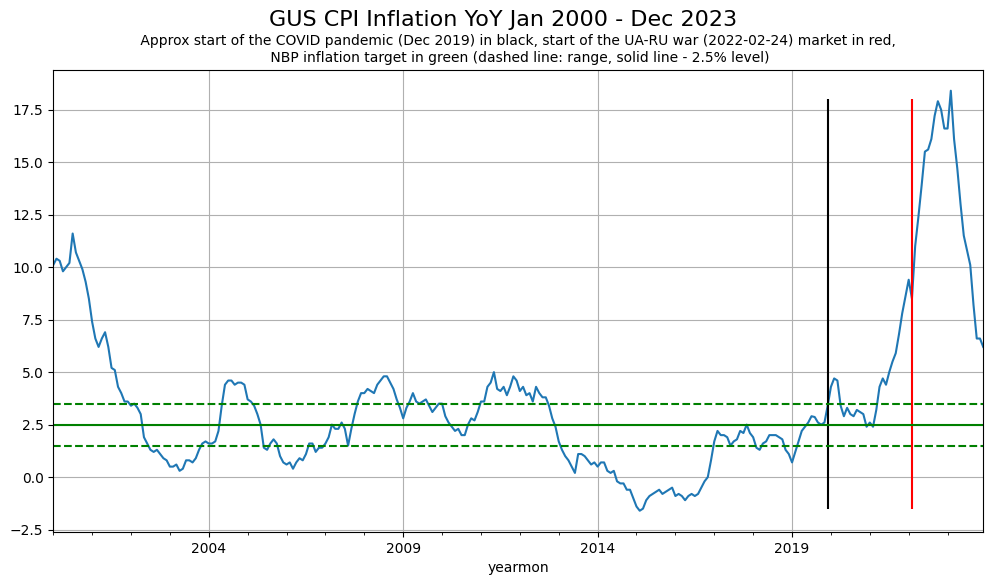

In [8]:
plt.figure(figsize=(12, 6))
data_gus["CPI_YoY_rate"].plot()
plt.suptitle("GUS CPI Inflation YoY Jan 2000 - Dec 2023", size=16)
plt.title(" Approx start of the COVID pandemic (Dec 2019) in black, start of the UA-RU war (2022-02-24) market in red, \n NBP inflation target in green (dashed line: range, solid line - 2.5% level)", size=10)
plt.vlines(x=date(2022, 2, 24), ymin=-1.5, ymax=18, color="red")
plt.vlines(x=date(2019, 12, 15), ymin=-1.5, ymax=18, color="black")
plt.hlines(y=[1.5, 3.5], xmin=date(2000, 1, 1), xmax=date(2023, 12, 31), color="green", linestyles="dashed")
plt.hlines(y=2.5, xmin=date(2000, 1, 1), xmax=date(2023, 12, 31), color="green", linestyles="solid")
plt.grid()

In [13]:
data.head()

,CPI_inflation_MoM,CPI_inflation_YoY,newly_built_flats_count,nominal_average_monthly_pay,CPI_MoM_rate,CPI_YoY_rate
yearmon,,,,,,
2000-01-01,101.8,110.1,5796,NaN,1.8,10.1
2000-02-01,100.9,110.4,6199,NaN,0.9,10.4
2000-03-01,100.9,110.3,5977,NaN,0.9,10.3
2000-04-01,100.4,109.8,5360,NaN,0.4,9.8
2000-05-01,100.7,110.0,5955,NaN,0.7,10.0


Text(0.5, 0.98, 'Rates of CPI inflation: YoY and MoM, 2000-2023')

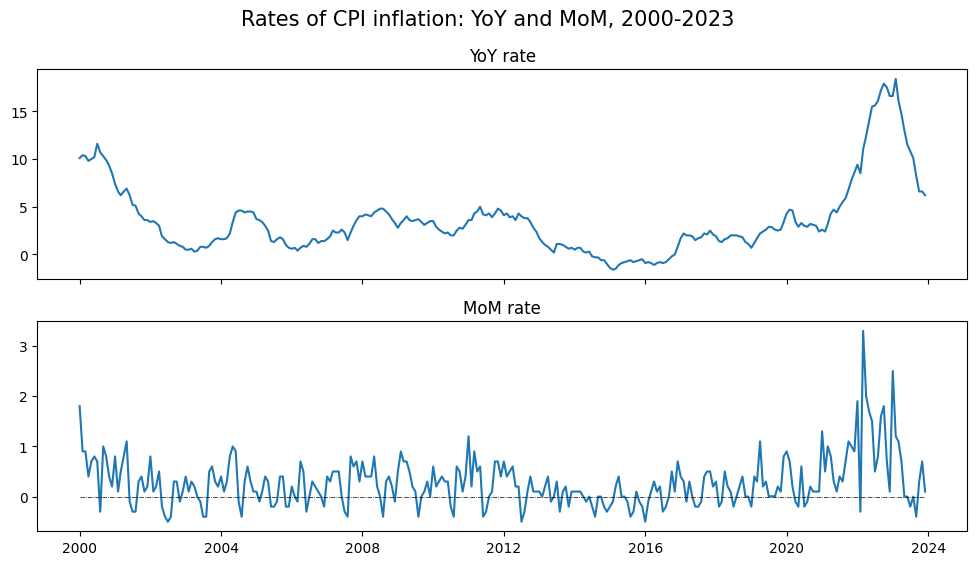

In [14]:
fig_rates = plt.figure(figsize=(12, 6))
ax_upper, ax_lower = fig_rates.subplots(2, 1, sharex=True)
ax_upper.plot(data.index, data["CPI_YoY_rate"])
ax_upper.set_title("YoY rate")
ax_lower.plot(data.index, data["CPI_MoM_rate"])
ax_lower.set_title("MoM rate")
ax_lower.set_yticks([-1, 0, 1, 2, 3])
ax_lower.plot(data.index, [0] * len(data.index), color="black", linestyle="-.", linewidth=0.5)
fig_rates.suptitle("Rates of CPI inflation: YoY and MoM, 2000-2023", size=15)
# ax_upper = fig_rates.add_subplot(2, 1, 1)
# ax_lower = fig_rates.add_subplot(2, 1, 2)

## 3. Cumulative Growth of the Level of Consumer Prices in the Years 2000-2023

In [9]:
data_gus["price_level"] = (data_gus["CPI_inflation_MoM"] / 100).cumprod()

Text(0.5, 1.0, 'index: XII 1999=~1')

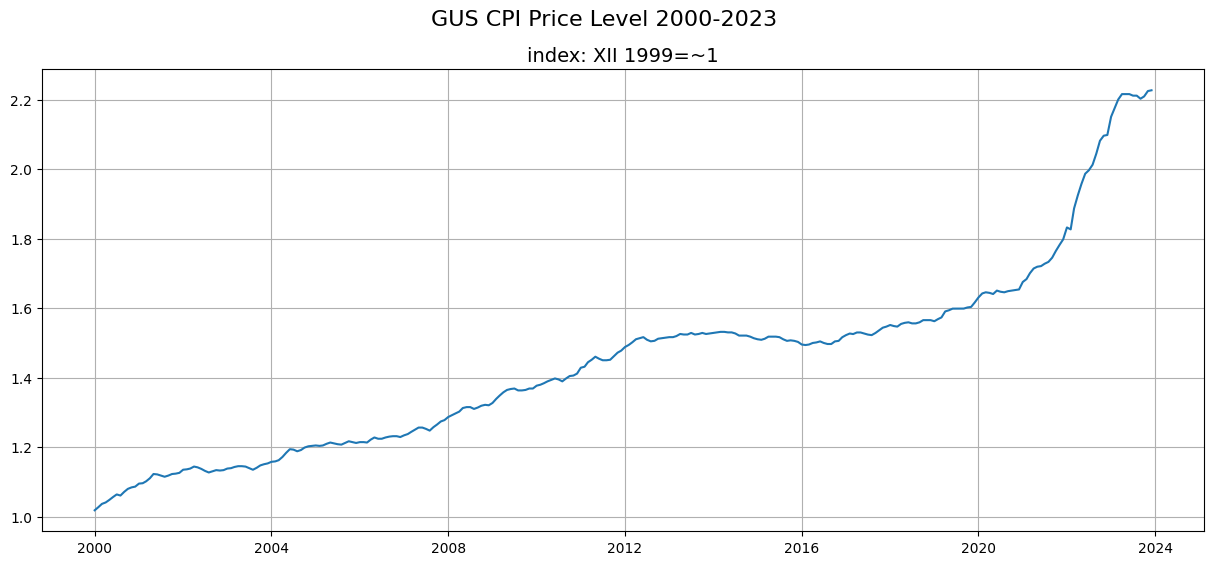

In [10]:
fig_prlvl = plt.figure(figsize=(15, 6))
ax = fig_prlvl.add_subplot(1, 1, 1)
ax.plot(data_gus.index, data_gus["price_level"])
ax.grid()
fig_prlvl.suptitle("GUS CPI Price Level 2000-2023", size=16)
ax.set_title("index: XII 1999=~1", size=14)

## 4. Zooming in the Period Since 2019: CPI Price Level Indexed to Dec 2018

In [11]:
data_gus_s19 = data_gus["2019-01-01":].copy(deep=True)

In [12]:
data_gus_s19["price_level"] = (data_gus_s19["CPI_inflation_MoM"] / 100).cumprod()

Text(0.5, 1.0, 'index: XII 2018 XII=~1')

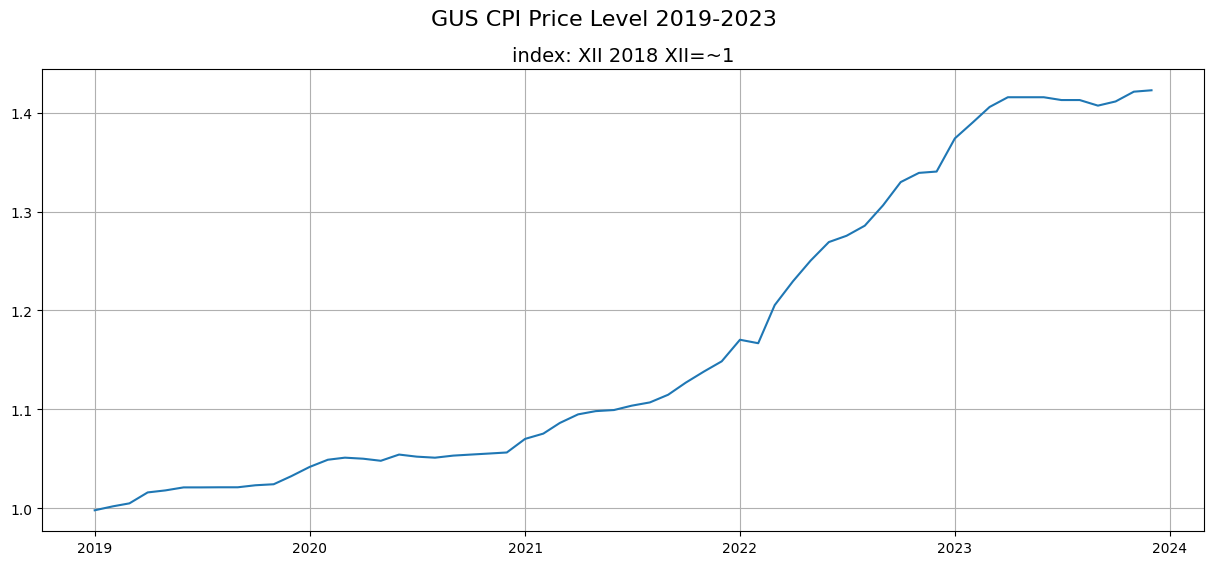

In [13]:
fig_prlvl = plt.figure(figsize=(15, 6))
ax = fig_prlvl.add_subplot(1, 1, 1)
ax.plot(data_gus_s19.index, data_gus_s19["price_level"])
ax.grid()
fig_prlvl.suptitle("GUS CPI Price Level 2019-2023", size=16)
ax.set_title("index: XII 2018 XII=~1", size=14)

## 5. CPI Inflation, Nominal and Real Remuneration in Enterprise Sector

In [15]:
data_pay = data_gus.loc[~data_gus["nominal_average_monthly_pay"].isna(), :].copy(deep=True)
data_pay["price_level_pay"] = (data_pay["CPI_inflation_MoM"] / 100).cumprod()
data_pay["real_average_monthly_pay"] = data_pay["nominal_average_monthly_pay"] / data_pay["price_level_pay"]
data_pay["nominal_pay_index"] = data_pay["nominal_average_monthly_pay"] / data_pay["nominal_average_monthly_pay"].iloc[0]
data_pay["real_pay_index"] = data_pay["real_average_monthly_pay"] / data_pay["real_average_monthly_pay"].iloc[0]
data_pay.head(3)

,CPI_inflation_MoM,CPI_inflation_YoY,newly_built_flats_count,nominal_average_monthly_pay,CPI_MoM_rate,CPI_YoY_rate,price_level,price_level_pay,real_average_monthly_pay,nominal_pay_index,real_pay_index
yearmon,,,,,,,,,,,
2005-01-01,100.1,103.7,11971,2385.269631,0.1,3.7,1.204527,1.001000,2382.886744,1.000000,1.000000
2005-02-01,99.9,103.6,7561,2411.313849,-0.1,3.6,1.203322,0.999999,2411.316260,1.010919,1.011931
2005-03-01,100.1,103.4,6968,2480.438263,0.1,3.4,1.204526,1.000999,2477.962781,1.039898,1.039900


Text(0.5, 0.98, 'Average Monthly Remuneration in Enterprise Sector (GUS data) - calculated indexes')

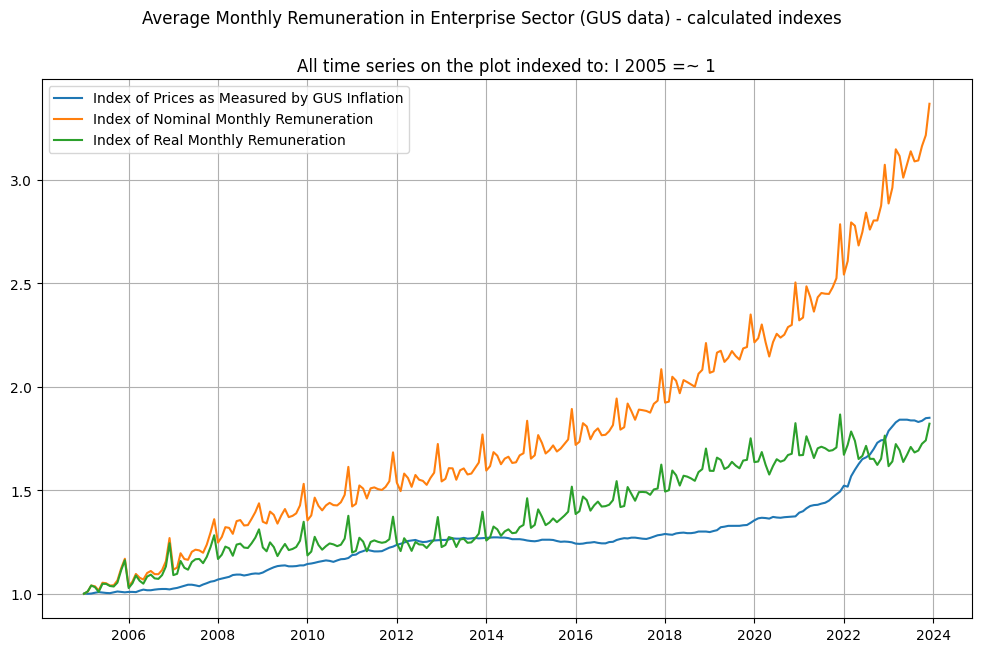

In [16]:
fig_pay = plt.figure(figsize=(12, 7))
ax_pay = fig_pay.add_subplot(1, 1, 1)
ax_pay.plot(data_pay.index, data_pay["price_level_pay"], label="Index of Prices as Measured by GUS Inflation")
ax_pay.plot(data_pay.index, data_pay["nominal_pay_index"], label="Index of Nominal Monthly Remuneration")
ax_pay.plot(data_pay.index, data_pay["real_pay_index"], label="Index of Real Monthly Remuneration")
ax_pay.grid()
ax_pay.legend()
ax_pay.set_title("All time series on the plot indexed to: I 2005 =~ 1")
fig_pay.suptitle("Average Monthly Remuneration in Enterprise Sector (GUS data) - calculated indexes")